### Only update $\beta$'s

In [1]:
using Plots
using Distributions
using StatsBase
using KernelDensity
include("logistic_functions.jl")
include("BPS.jl") 
include("NRG.jl")

NRG_ss (generic function with 4 methods)

In [2]:
function simulate_α(c, Nobs)
    α_true = zeros(Nobs)
    α_true[1] = rand(Normal())
    for t in 2:Nobs 
        α_true[t] = c*α_true[t-1] + rand(Normal())
    end
    α_true
end

simulate_α (generic function with 1 method)

In [10]:
d, Nobs = 50, 500
c = 0.5
β_true = -ones(d)/5
α_true = simulate_α(c, Nobs);

In [11]:
X = rand(d, Nobs)
y = [rand(1)[1] < 1/(1 + exp(-α_true[i]-dot(β_true,X[:,i]))) for i in 1:Nobs] .+ 0
mean(y)

0.014

In [12]:
α_0, β_0 = copy(α_true), copy(β_true)
mb_size = 2
include_α = true 
replace = true
Print = true;

In [15]:
start = time()
skeleton_bps, bouncing_bps = BPS_ss(X, y, 10^5, mb_size, α_0, β_0, c, 2, Print, include_α, replace)
print( round((time()-start)/60, 2), " minutes to run")

0.58% of bounces accepted 
6.45 minutes to run

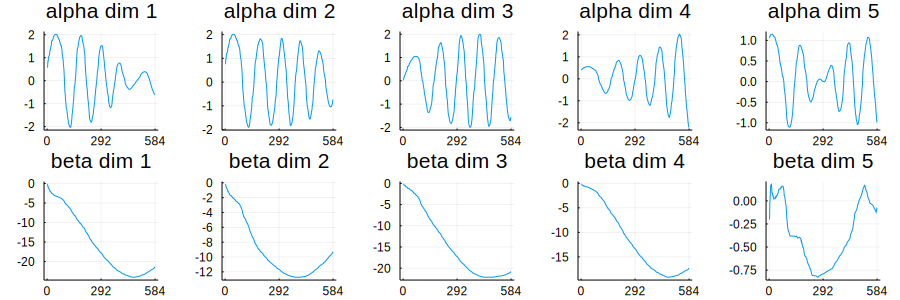

In [16]:
plot_traj(skeleton_bps, Nobs)